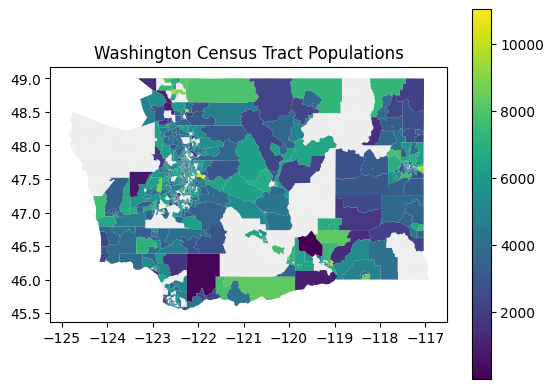

In [16]:
# student name


from re import L
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


# def main():
#     state_data = load_in_data(
#         "food_access/washington.json", "food_access/food_access.csv"
#     )
#     print(percentage_food_data(state_data))
#     # plot_map(state_data)
#     # plot_population_map(state_data)
#     # plot_population_county_map(state_data)
#     # plot_food_access_by_county(state_data)
#     # plot_low_access_tracts(state_data)
#     pass


def load_in_data(wa_census_dataset: str, food_access_dataset: str) -> gpd.GeoDataFrame:
    """
    merges census_dataset and food_access_dataset, returning
    the result as a GeoDataFrame

    Args:
        census_dataset (str): path to census dataset file
        food_access_dataset (str): path to the food access dataset file
    
    Returns:
        gpd.GeoDataFrame: Merged GeoDataFrame
    """
    # read the files
    census = gpd.read_file(wa_census_dataset)
    food_access = pd.read_csv(food_access_dataset, index_col=0)

    # return the files, merged on "CTIFP00" and "CensusTract"
    merged = census.merge(
        food_access,
        left_on="CTIDFP00",
        right_on="CensusTract",
        how="left",
    )
    return merged


def percentage_food_data(data: pd.DataFrame):
    """
    Returns the percentage of census tracts in Washington for which we have food access data

    Args:
        data (pd.DataFrame): merged data of wa census and food_census
    """

    total_census_tracts = len(data)

    # Number of census tracts with food access data
    tracts_with_food_data = data["CensusTract"].isna().sum()

    # Calculate the percentage
    percentage = ((total_census_tracts - tracts_with_food_data) / total_census_tracts) * 100
    return percentage


def plot_map(data):
    """
    plot the shapes of all the census tracts in Washington state

    Args:
        data (pd.DataFrame): merged data of wa census and food_census
    """
    data.plot()
    plt.title("Washington State")
    plt.savefig("map.png", bbox_inches="tight")


def plot_population_map(data):
    """
    plot the census on top of the 

    Args:
        data (pd.DataFrame): merged data of wa census and food_census
    """
    data = data[["CensusTract", "POP2010", "geometry"]]
    fig, ax = plt.subplots(1)
    # plot background color
    data.plot(ax=ax, color="#EEEEEE")
    # plot population & census tract on top
    data.plot(ax=ax, column="POP2010", legend=True)
    # name the figure
    plt.title("Washington Census Tract Populations")
    # save the figure
    plt.savefig("population_map.png")


def plot_population_county_map(data):
    pass


def plot_low_access_tracts(data):
    pass

data = load_in_data("food_access\\washington.json", "food_access\\food_access.csv")
plot_population_map(data)